In [37]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


In [38]:
data= xr.open_dataset('Egypt.nc')
data


<xarray.Dataset>
Dimensions:   (datetime: 3652, lon: 51, lat: 41)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2010-12-31
  * lon       (lon) float32 24.5 24.75 25.0 25.25 25.5 ... 36.25 36.5 36.75 37.0
  * lat       (lat) float32 32.0 31.75 31.5 31.25 31.0 ... 22.75 22.5 22.25 22.0
Data variables:
    crs       int32 ...
    precip    (datetime, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Fri Apr 28 11:43:56 2023: cdo mergetime PERSIANN_Egypt_2023...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [42]:
data_array=data_set.precip.sel(lon=30.75, lat=26.75, method='nearest')
data_array1=data_array.sel(datetime=slice('2001','2010'))
data_array1

<xarray.DataArray 'precip' (datetime: 3652)>
array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2010-12-31
    lon       float32 30.75
    lat       float32 26.75
Attributes:
    grid_mapping:  crs

In [41]:
data_set= data.where(data !=-99.0)
data_set

<xarray.Dataset>
Dimensions:   (datetime: 3652, lat: 41, lon: 51)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2010-12-31
  * lon       (lon) float32 24.5 24.75 25.0 25.25 25.5 ... 36.25 36.5 36.75 37.0
  * lat       (lat) float32 32.0 31.75 31.5 31.25 31.0 ... 22.75 22.5 22.25 22.0
Data variables:
    crs       float64 1.0
    precip    (datetime, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Fri Apr 28 11:43:56 2023: cdo mergetime PERSIANN_Egypt_2023...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

# QUESTION 1 

In [8]:
# Resample to monthly time steps and calculate monthly totals
total_mon= data_array1.resample(datetime='M').sum('datetime')

In [9]:
# Calculate monthly climatology (average of each month across all years)
climatology = total_mon.groupby('datetime.month').mean('datetime')

# QUESTION 2


In [10]:
# Resample to annual time steps and calculate annual totals
total_annual = data_array1.resample(datetime='y').sum('datetime') 



In [11]:
# Calculate the mean annual precipitation over the spatial dimensions (latitude and longitude)
annualmean = total_annual.groupby('datetime.year').mean('datetime')



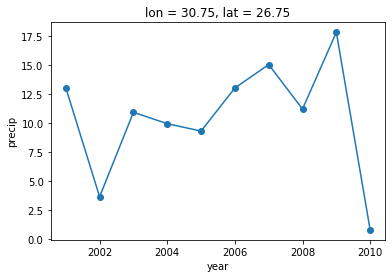

In [12]:
annualmean.plot(marker='o')



In [13]:
data_array=data_set.sel(lon=30.75, lat=26.75 ,method='nearest')
data_set=data_array.sel(datetime=slice('2001','2010'))
data_set

<xarray.Dataset>
Dimensions:   (datetime: 3652)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2010-12-31
    lon       float32 30.75
    lat       float32 26.75
Data variables:
    crs       float64 1.0
    precip    (datetime) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Fri Apr 28 11:43:56 2023: cdo mergetime PERSIANN_Egypt_2023...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...


# QUESTION 3

# NUMBER OF DRY AND WET DAYS

In [14]:
# Compute number of dry (RR<1mm) and wet (RR>=1mm) days
drydays = data_set.where(data_set['precip'] < 1).precip#count(dim='datetime')
wetdays = data_set.where(data_set['precip'] >= 1).precip#count(dim='datetime')
wetdays

<xarray.DataArray 'precip' (datetime: 3652)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2010-12-31
    lon       float32 30.75
    lat       float32 26.75
Attributes:
    grid_mapping:  crs

In [15]:
# Compute monthly and annual dry/wet days
drydays_mon = drydays.resample(datetime='M').sum('datetime')
wetdays_mon = wetdays.resample(datetime='M').sum('datetime')
drydays_annual= drydays.resample(datetime='Y').sum('datetime')
wetdays_annual = wetdays.resample(datetime='Y').sum('datetime')

In [16]:
# Plot spatial visualization of dry and wet days
#dry_days.plot()
#plt.show()
#wet_days.plot()
#plt.show()

# AVERAGE MONTHLY AND ANNUAL WET AND DRY

In [17]:
# Plot timeseries of monthly and annual dry/wet days
mondrymean = drydays.groupby('datetime.month').mean('datetime')
monwetmean = wetdays.groupby('datetime.month').mean('datetime')

annualdrymean = drydays.groupby('datetime.year').mean('datetime')
annualwetmean = wetdays.groupby('datetime.year').mean('datetime')

# TIMESERIES PLOTS ON AVERAGE AND MONTHLY WET AND DRY DAYS

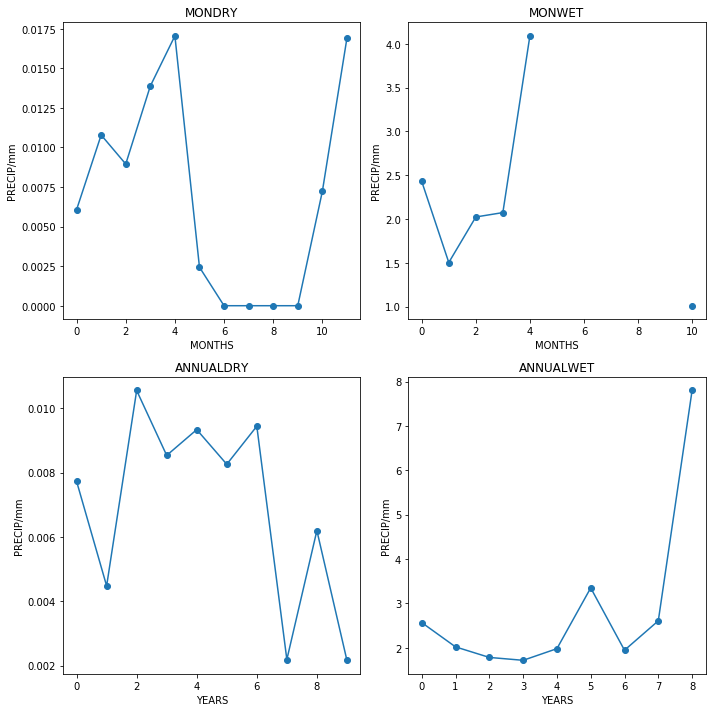

In [18]:
fig, axs = plt.subplots(2, 2, figsize= (10,10)) 
axs[0, 0].plot(mondrymean, marker='o') 
axs[0, 0].set_title("MONDRY")
axs[0, 0].set_ylabel("PRECIP/mm")
axs[0, 0].set_xlabel("MONTHS")
axs[0, 1].plot(monwetmean, marker='o') 
axs[0, 1].set_title("MONWET")
axs[0, 1].set_ylabel("PRECIP/mm")
axs[0, 1].set_xlabel("MONTHS")
axs[1, 0].plot(annualdrymean, marker='o')
axs[1, 0].set_title("ANNUALDRY")
axs[1, 0].set_ylabel("PRECIP/mm")
axs[1, 0].set_xlabel("YEARS")
axs[1, 1].plot(annualwetmean, marker='o')
axs[1, 1].set_title("ANNUALWET")
axs[1, 1].set_ylabel("PRECIP/mm")
axs[1, 1].set_xlabel("YEARS")
fig.tight_layout() 

# spatial plot

In [19]:
dw= data.where(data !=-99.0)
dw

<xarray.Dataset>
Dimensions:   (datetime: 3652, lat: 41, lon: 51)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2010-12-31
  * lon       (lon) float32 24.5 24.75 25.0 25.25 25.5 ... 36.25 36.5 36.75 37.0
  * lat       (lat) float32 32.0 31.75 31.5 31.25 31.0 ... 22.75 22.5 22.25 22.0
Data variables:
    crs       float64 1.0
    precip    (datetime, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Fri Apr 28 11:43:56 2023: cdo mergetime PERSIANN_Egypt_2023...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [20]:
# Compute number of dry (RR<1mm) and wet (RR>=1mm) days
drydays = dw.where(dw['precip'] < 1).precip#count(dim='datetime')
wetdays = dw.where(dw['precip'] >= 1).precip#count(dim='datetime')
wetdays


<xarray.DataArray 'precip' (datetime: 3652, lat: 41, lon: 51)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2010-12-31
  * lon       (lon) float32 24.5 24.75 25.0 25.25 25.5 ... 36.25 36.5 36.75 37.0
  * lat       (lat) float32 32.0 31.75 31.5 31.25 31.0 ... 22.75 22.5 22.25 22.0
Attributes:
    grid_mapping:  crs

In [21]:
mondrymean = drydays.groupby('datetime.month').mean('datetime')
monwetmean = wetdays.groupby('datetime.month').mean('datetime')

annualdrymean = drydays.groupby('datetime.year').mean('datetime')
annualwetmean = wetdays.groupby('datetime.year').mean('datetime')

/home/peterlyn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


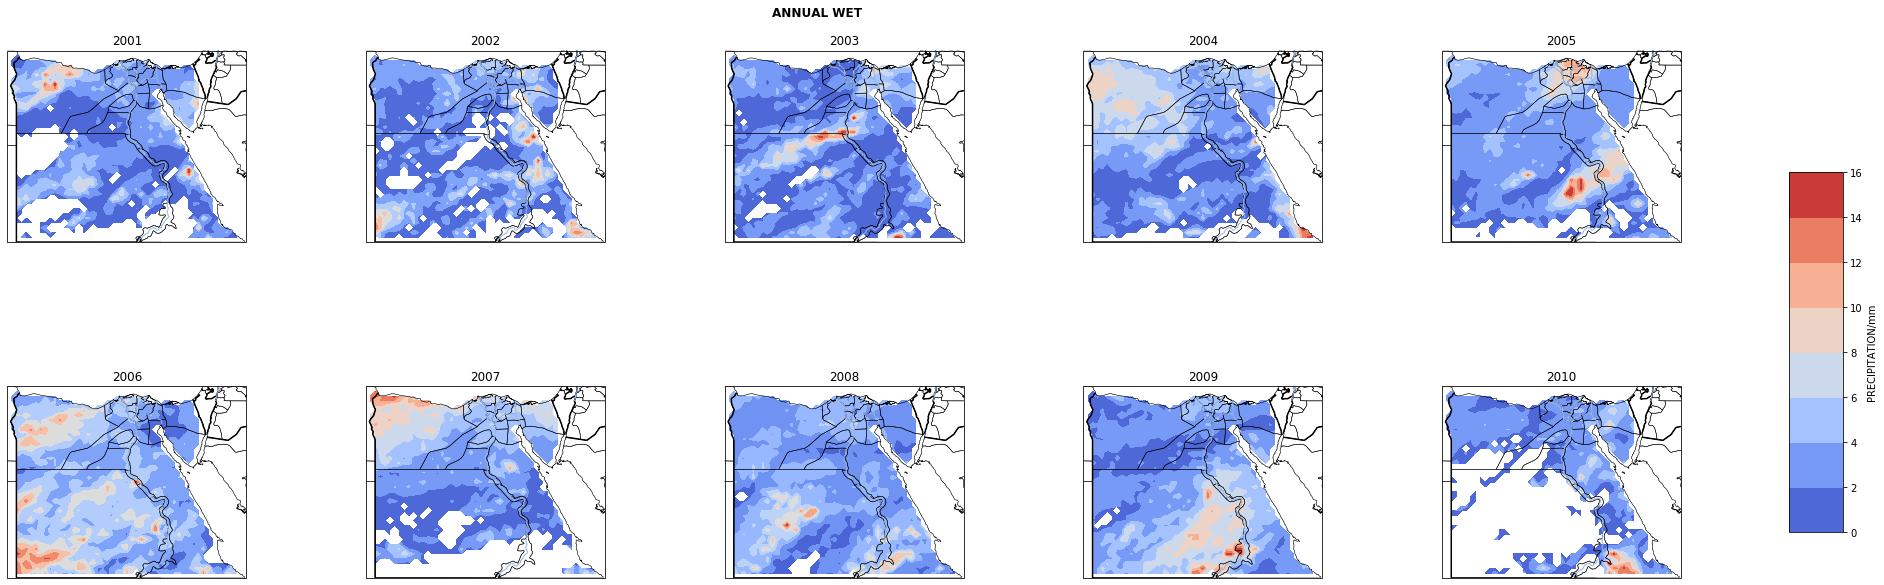

In [22]:
fig,ax=plt.subplots(2,5,figsize=(30,10),
                   subplot_kw={'projection':ccrs.PlateCarree()})
ax=ax.flatten()
names_of_months=["2001","2002","2003","2004","2005","2006","2007","2008","2009","2010"]
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE,linewidth=0.2)
    ax[i].add_feature(cfeature.BORDERS,linewidth=1.5)
    ax[i].add_feature(cfeature.STATES,linewidth=0.5)
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([24.5,37,32,22])
    ax[i].set_title(names_of_months[i]),
    cb= ax[i].contourf(annualwetmean.lon, annualwetmean.lat, annualwetmean[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.95,0.25,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='PRECIPITATION/mm')
fig.subplots_adjust(wspace=0.5,top=0.98)
plt.suptitle('ANNUAL WET', fontweight='bold')

plt.show()

/home/peterlyn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


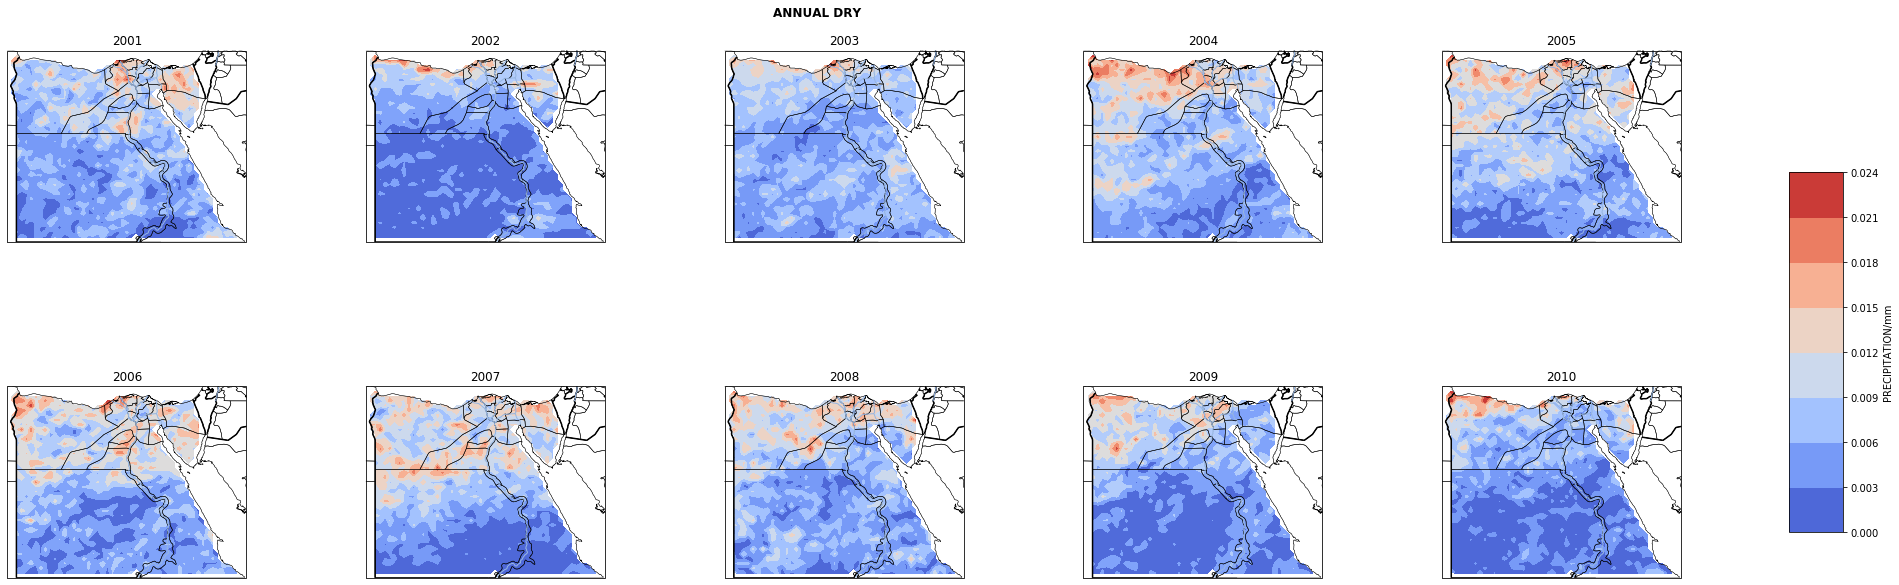

In [23]:
fig,ax=plt.subplots(2,5,figsize=(30,10),
                   subplot_kw={'projection':ccrs.PlateCarree()})
ax=ax.flatten()
names_of_months=["2001","2002","2003","2004","2005","2006","2007","2008","2009","2010"]
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE,linewidth=0.2)
    ax[i].add_feature(cfeature.BORDERS,linewidth=1.5)
    ax[i].add_feature(cfeature.STATES,linewidth=0.5)
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([24.5,37,32,22])
    ax[i].set_title(names_of_months[i]),
    cb= ax[i].contourf(annualdrymean.lon, annualdrymean.lat, annualdrymean[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.95,0.25,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='PRECIPITATION/mm')
fig.subplots_adjust(wspace=0.5,top=0.98)
plt.suptitle('ANNUAL DRY', fontweight='bold')

plt.show()

/home/peterlyn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


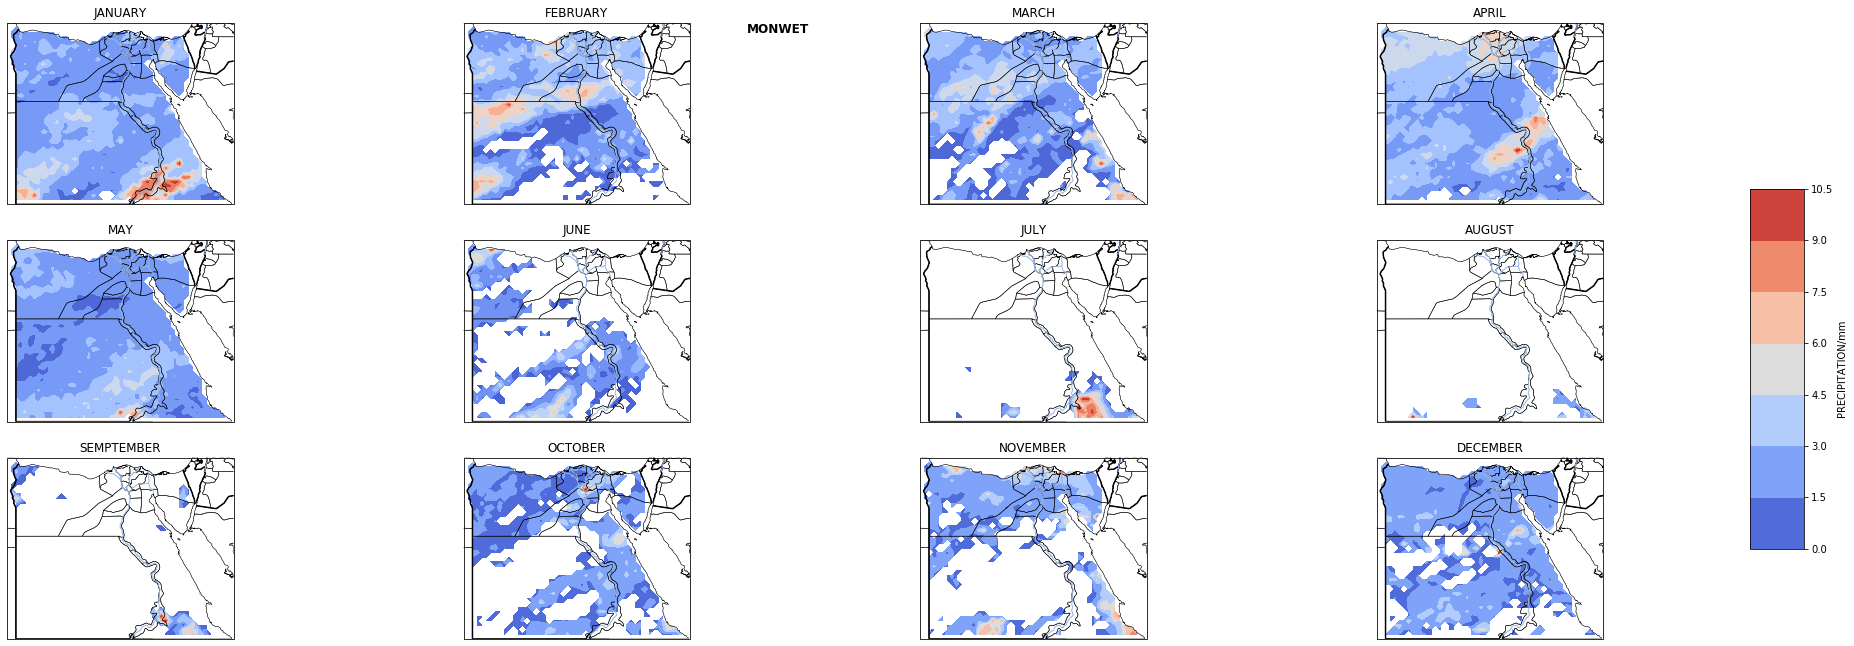

In [24]:
fig,ax=plt.subplots(3,4,figsize=(30,10),
                   subplot_kw={'projection':ccrs.PlateCarree()})
ax=ax.flatten()
names_of_months=["JANUARY","FEBRUARY","MARCH","APRIL","MAY","JUNE","JULY","AUGUST","SEMPTEMBER","OCTOBER","NOVEMBER","DECEMBER"]
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE,linewidth=0.2)
    ax[i].add_feature(cfeature.BORDERS,linewidth=1.5)
    ax[i].add_feature(cfeature.STATES,linewidth=0.5)
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([24.5,37,32,22])
    ax[i].set_title(names_of_months[i]),
    cb= ax[i].contourf(monwetmean.lon, monwetmean.lat, monwetmean[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.95,0.25,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='PRECIPITATION/mm')
fig.subplots_adjust(wspace=0.5,top=0.98)
plt.suptitle('MONWET', fontweight='bold')

plt.show()

/home/peterlyn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


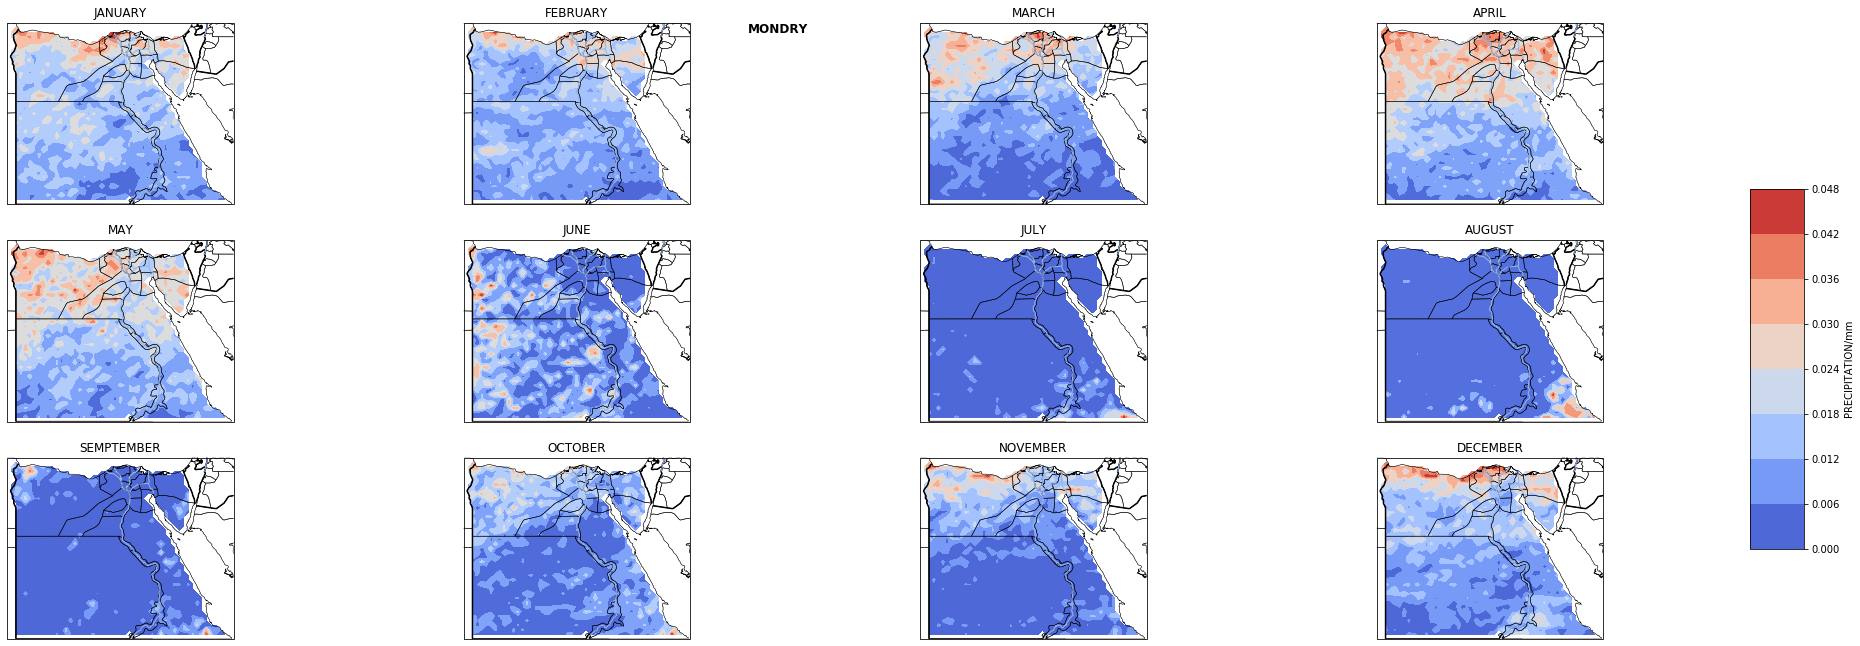

In [25]:
fig,ax=plt.subplots(3,4,figsize=(30,10),
                   subplot_kw={'projection':ccrs.PlateCarree()})
ax=ax.flatten()
names_of_months=["JANUARY","FEBRUARY","MARCH","APRIL","MAY","JUNE","JULY","AUGUST","SEMPTEMBER","OCTOBER","NOVEMBER","DECEMBER"]
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE,linewidth=0.2)
    ax[i].add_feature(cfeature.BORDERS,linewidth=1.5)
    ax[i].add_feature(cfeature.STATES,linewidth=0.5)
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([24.5,37,32,22])
    ax[i].set_title(names_of_months[i]),
    cb= ax[i].contourf(mondrymean.lon, mondrymean.lat, mondrymean[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.95,0.25,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='PRECIPITATION/mm')
fig.subplots_adjust(wspace=0.5,top=0.98)
plt.suptitle('MONDRY', fontweight='bold')

plt.show()

# QUESTION 4

In [26]:
# Compute number of dry (RR<1mm) and wet (RR>=1mm) days
extremedrydays = data_set.where(data_set['precip'] > 10).precip#count(dim='datetime')
extremewetdays = data_set.where(data_set['precip'] > 20).precip#count(dim='datetime')
extremewetdays

<xarray.DataArray 'precip' (datetime: 3652)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2010-12-31
    lon       float32 30.75
    lat       float32 26.75
Attributes:
    grid_mapping:  crs

# AVERAGE MONTHLY AND ANNUAL FOR EXTREME DRY DAYS AND  WET DAYS

In [27]:
extrememondry_mean = extremedrydays.groupby('datetime.month').mean('datetime')
extrememonwet_mean = extremewetdays.groupby('datetime.month').mean('datetime')

extremeannualdry_mean = extremedrydays.groupby('datetime.year').mean('datetime')
extremeannualwet_mean = extremewetdays.groupby('datetime.year').mean('datetime')

# TIMESERIES PLOT OF EXTREME MONTHLY AND ANNUAL DRY DAYS AND WET DAYS

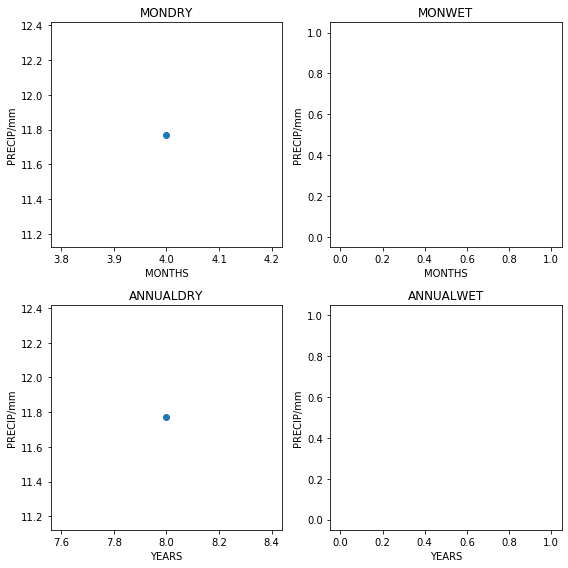

In [28]:
fig, axs = plt.subplots(2, 2, figsize= (8,8)) 
axs[0, 0].plot(extrememondry_mean, marker='o') 
axs[0, 0].set_title("MONDRY")
axs[0, 0].set_ylabel("PRECIP/mm")
axs[0, 0].set_xlabel("MONTHS")
axs[0, 1].plot(extrememonwet_mean, marker='o') 
axs[0, 1].set_title("MONWET")
axs[0, 1].set_ylabel("PRECIP/mm")
axs[0, 1].set_xlabel("MONTHS")
axs[1, 0].plot(extremeannualdry_mean, marker='o')
axs[1, 0].set_title("ANNUALDRY")
axs[1, 0].set_ylabel("PRECIP/mm")
axs[1, 0].set_xlabel("YEARS")
axs[1, 1].plot(extremeannualwet_mean, marker='o')
axs[1, 1].set_title("ANNUALWET")
axs[1, 1].set_ylabel("PRECIP/mm")
axs[1, 1].set_xlabel("YEARS")
fig.tight_layout() 



# SPATIAL PLOTS

In [29]:
dw= data.where(data !=-99.0)
dw

<xarray.Dataset>
Dimensions:   (datetime: 3652, lat: 41, lon: 51)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2010-12-31
  * lon       (lon) float32 24.5 24.75 25.0 25.25 25.5 ... 36.25 36.5 36.75 37.0
  * lat       (lat) float32 32.0 31.75 31.5 31.25 31.0 ... 22.75 22.5 22.25 22.0
Data variables:
    crs       float64 1.0
    precip    (datetime, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Fri Apr 28 11:43:56 2023: cdo mergetime PERSIANN_Egypt_2023...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [30]:
extremedry_days = dw.where(dw['precip'] > 10).precip#count(dim='datetime')
extremewet_days = dw.where(dw['precip'] > 20).precip#count(dim='datetime')
extremewet_days


<xarray.DataArray 'precip' (datetime: 3652, lat: 41, lon: 51)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2010-12-31
  * lon       (lon) float32 24.5 24.75 25.0 25.25 25.5 ... 36.25 36.5 36.75 37.0
  * lat       (lat) float32 32.0 31.75 31.5 31.25 31.0 ... 22.75 22.5 22.25 22.0
Attributes:
    grid_mapping:  crs

In [31]:
extrememondry_mean = extremedry_days.groupby('datetime.month').mean('datetime')
extrememonwet_mean = extremewet_days.groupby('datetime.month').mean('datetime')

extremeannualdry_mean = extremedry_days.groupby('datetime.year').mean('datetime')
extremeannualwet_mean = extremewet_days.groupby('datetime.year').mean('datetime')

/home/peterlyn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/home/peterlyn/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1520: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/peterlyn/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1521: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/home/peterlyn/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1169: RuntimeWarning: invalid value encountered in less
  under = np.nonzero(lev < self.zmin)[0]
/home/peterlyn/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1171: R

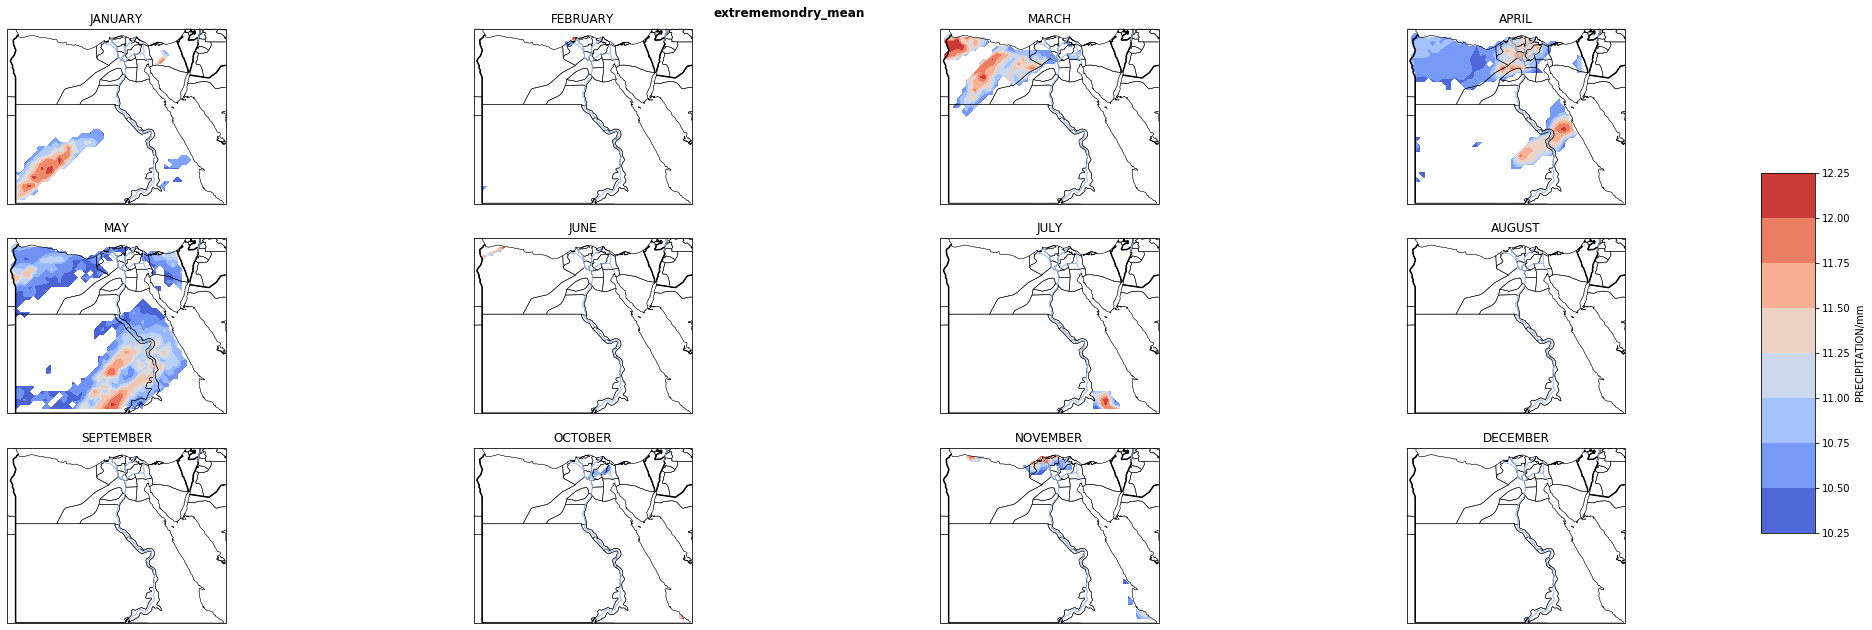

In [32]:
fig,ax=plt.subplots(3,4,figsize=(30,10),
                   subplot_kw={'projection':ccrs.PlateCarree()})
ax=ax.flatten()
names_of_months=["JANUARY","FEBRUARY","MARCH","APRIL","MAY","JUNE","JULY","AUGUST","SEPTEMBER","OCTOBER","NOVEMBER","DECEMBER"]
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE,linewidth=0.2)
    ax[i].add_feature(cfeature.BORDERS,linewidth=1.5)
    ax[i].add_feature(cfeature.STATES,linewidth=0.5)
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([24.5,37,32,22])
    ax[i].set_title(names_of_months[i]),
    cb= ax[i].contourf(extrememondry_mean.lon, extrememondry_mean.lat, extrememondry_mean[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.95,0.25,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='PRECIPITATION/mm')
fig.subplots_adjust(wspace=0.7,top=0.95)
plt.suptitle('extrememondry_mean', fontweight='bold')

plt.show()

/home/peterlyn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


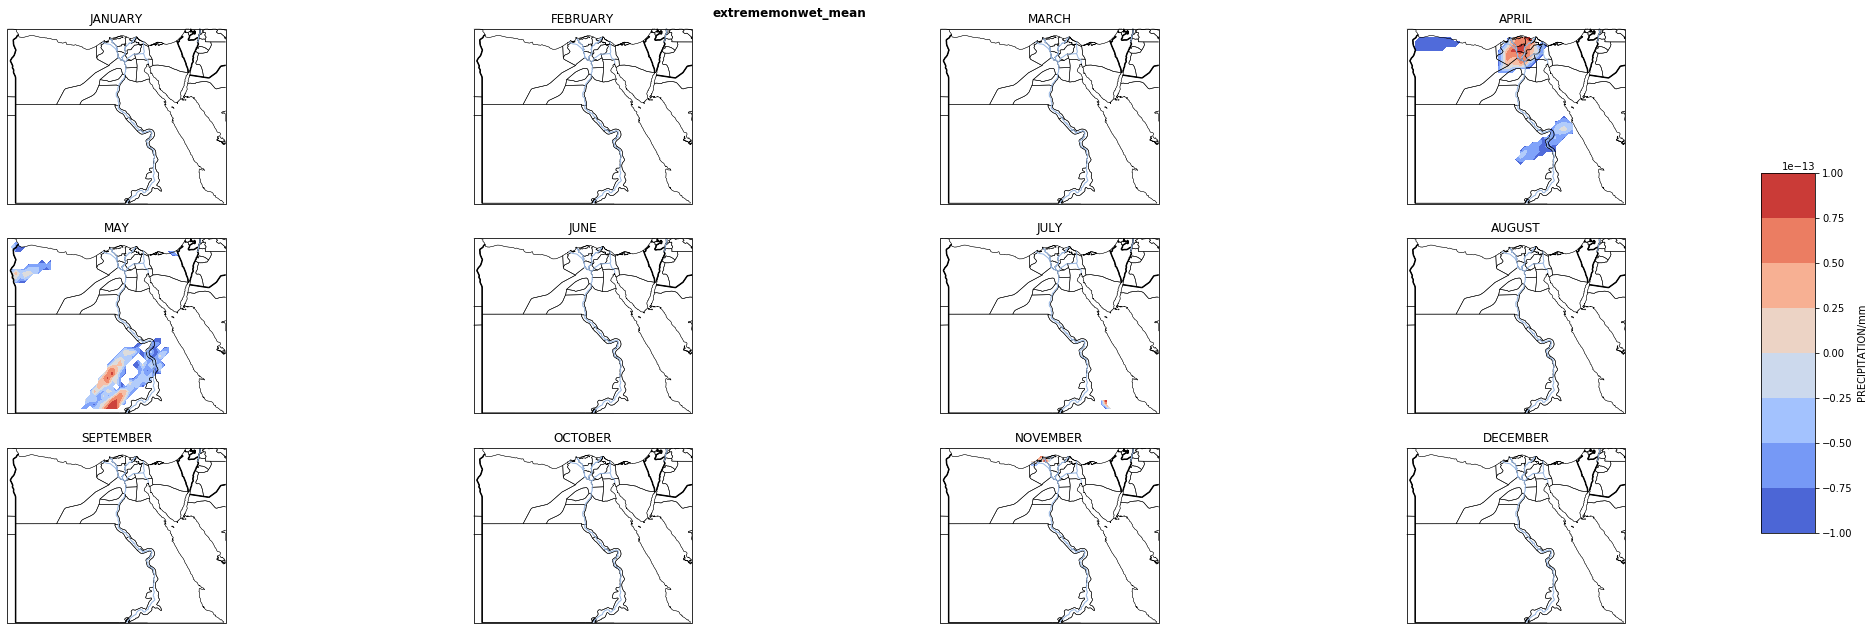

In [33]:
fig,ax=plt.subplots(3,4,figsize=(30,10),
                   subplot_kw={'projection':ccrs.PlateCarree()})
ax=ax.flatten()
names_of_months=["JANUARY","FEBRUARY","MARCH","APRIL","MAY","JUNE","JULY","AUGUST","SEPTEMBER","OCTOBER","NOVEMBER","DECEMBER"]
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE,linewidth=0.2)
    ax[i].add_feature(cfeature.BORDERS,linewidth=1.5)
    ax[i].add_feature(cfeature.STATES,linewidth=0.5)
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([24.5,37,32,22])
    ax[i].set_title(names_of_months[i]),
    cb= ax[i].contourf(extrememonwet_mean.lon, extrememonwet_mean.lat, extrememonwet_mean[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.95,0.25,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='PRECIPITATION/mm')
fig.subplots_adjust(wspace=0.7,top=0.95)
plt.suptitle('extrememonwet_mean', fontweight='bold')

plt.show()

/home/peterlyn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


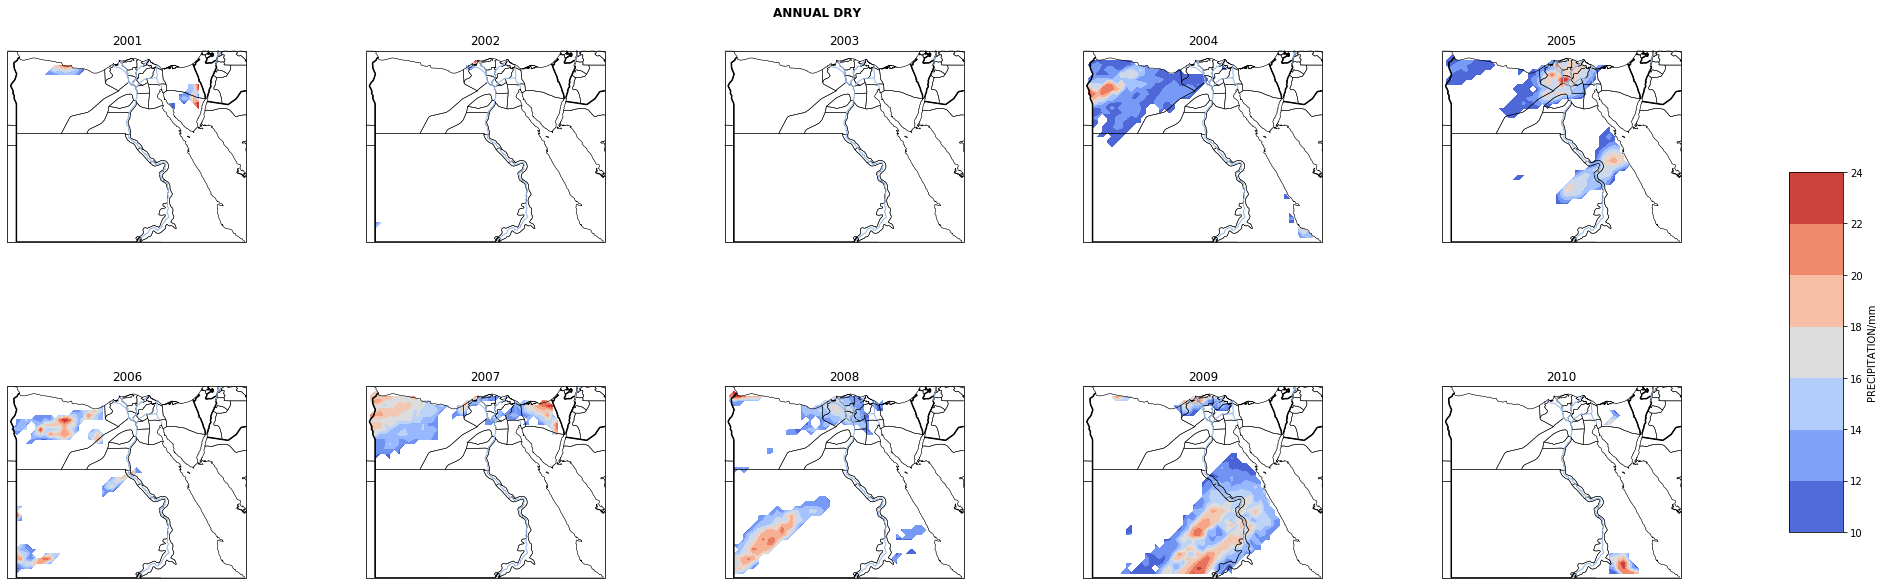

In [34]:
fig,ax=plt.subplots(2,5,figsize=(30,10),
                   subplot_kw={'projection':ccrs.PlateCarree()})
ax=ax.flatten()
names_of_months=["2001","2002","2003","2004","2005","2006","2007","2008","2009","2010"]
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE,linewidth=0.2)
    ax[i].add_feature(cfeature.BORDERS,linewidth=1.5)
    ax[i].add_feature(cfeature.STATES,linewidth=0.5)
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([24.5,37,32,22])
    ax[i].set_title(names_of_months[i]),
    cb= ax[i].contourf(extremeannualdry_mean.lon, extremeannualdry_mean.lat, extremeannualdry_mean[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.95,0.25,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='PRECIPITATION/mm')
fig.subplots_adjust(wspace=0.5,top=0.98)
plt.suptitle('ANNUAL DRY', fontweight='bold')

plt.show()
    

/home/peterlyn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


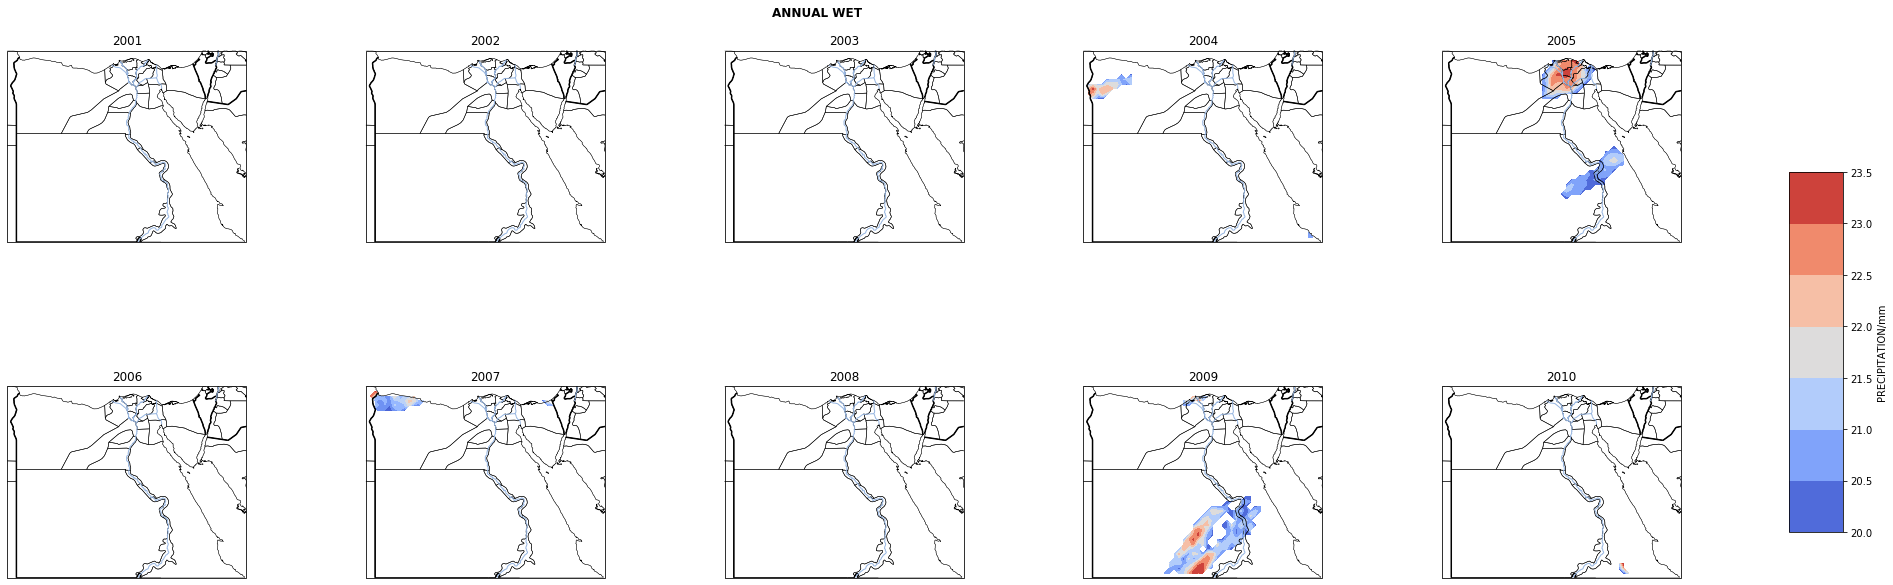

In [35]:
fig,ax=plt.subplots(2,5,figsize=(30,10),
                   subplot_kw={'projection':ccrs.PlateCarree()})
ax=ax.flatten()
names_of_months=["2001","2002","2003","2004","2005","2006","2007","2008","2009","2010"]
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE,linewidth=0.2)
    ax[i].add_feature(cfeature.BORDERS,linewidth=1.5)
    ax[i].add_feature(cfeature.STATES,linewidth=0.5)
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([24.5,37,32,22])
    ax[i].set_title(names_of_months[i]),
    cb= ax[i].contourf(extremeannualwet_mean.lon, extremeannualwet_mean.lat, extremeannualwet_mean[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.95,0.25,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='PRECIPITATION/mm')
fig.subplots_adjust(wspace=0.5,top=0.98)
plt.suptitle('ANNUAL WET', fontweight='bold')

plt.show()
    